In [111]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [112]:
df_ks = pd.read_csv('KS_train_data.csv', delimiter= ',')
data_ks_to_predict = pd.read_csv('KS_test_data.csv', delimiter= ';')

In [113]:
df_ks['usd_goal'] = df_ks['goal'] * df_ks['fx_rate']
data_ks_to_predict['usd_goal'] = data_ks_to_predict['goal'] * data_ks_to_predict['fx_rate']

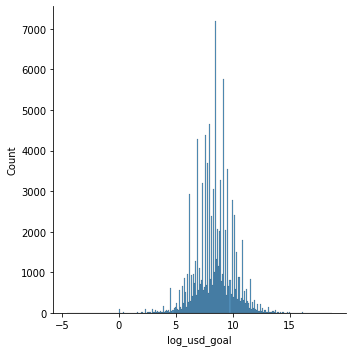

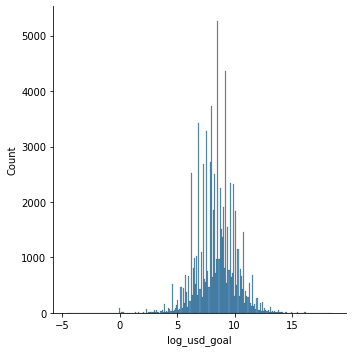

In [114]:
df_ks['log_usd_goal'] = np.log(df_ks['usd_goal'])
data_ks_to_predict['log_usd_goal'] = np.log(data_ks_to_predict['usd_goal'])

sns.displot(df_ks['log_usd_goal'])
sns.displot(data_ks_to_predict['log_usd_goal'])

In [115]:
duration = pd.to_datetime(df_ks['deadline'], unit='s') - pd.to_datetime(df_ks['launched_at'], unit='s')
df_ks['promotion_duration'] = duration / np.timedelta64(1, 'D')

to_predict_duration = pd.to_datetime(data_ks_to_predict['deadline'], unit='s') - pd.to_datetime(data_ks_to_predict['launched_at'], unit='s')
data_ks_to_predict['to_predict_duration'] = duration / np.timedelta64(1, 'D')

count    78065.000000
mean        33.826149
std         13.187696
min          1.000000
25%         29.972755
50%         30.000000
75%         36.000000
max         91.958333
Name: to_predict_duration, dtype: float64

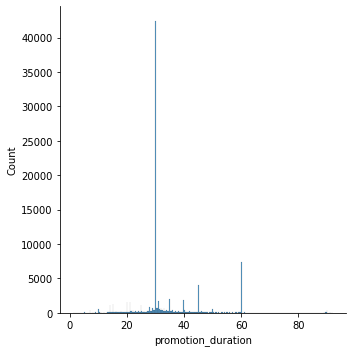

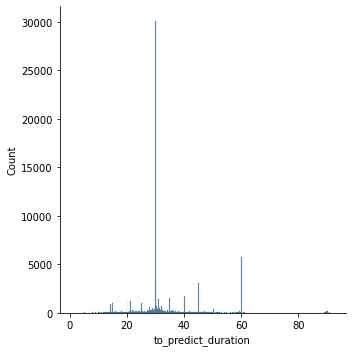

In [116]:
sns.displot(df_ks['promotion_duration'])
df_ks['promotion_duration'].describe()

sns.displot(data_ks_to_predict['to_predict_duration'])
data_ks_to_predict['to_predict_duration'].describe()

In [117]:
#top_10 = df_ks['promotion_duration'].value_counts()[:10].index
#print(top_10)

#to_predict_top_10 = data_ks_to_predict['promotion_duration'].value_counts()[:10].index
#print(to_predict_top_10)

In [118]:
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

In [119]:
# Converting string labels into numbers.
df_ks['country_encoded'] = le.fit_transform(df_ks['country'])

# print(df_ks['country_encoded'] )

data_ks_to_predict['country_encoded'] = le.fit_transform(data_ks_to_predict['country'])


In [120]:
df_ks['category_encoded'] = le.fit_transform(df_ks['category'])

data_ks_to_predict['category_encoded'] = le.fit_transform(data_ks_to_predict['category'])

In [121]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc_category = pd.DataFrame(enc.fit_transform(df_ks[['category']]).toarray())
to_predict_enc_category = pd.DataFrame(enc.fit_transform(data_ks_to_predict[['category']]).toarray())

In [122]:
df_ks = df_ks.join(enc_category)

data_ks_to_predict = data_ks_to_predict.join(to_predict_enc_category)

In [123]:
enc_country = pd.DataFrame(enc.fit_transform(df_ks[['country']]).toarray())
to_predict_enc_country = pd.DataFrame(enc.fit_transform(data_ks_to_predict[['country']]).toarray())

In [124]:
features = ['log_usd_goal','staff_pick',0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14]

X = df_ks[features]
y = df_ks['funded']

In [125]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100)

knn.fit(X, y)

KNeighborsClassifier(n_neighbors=100)

In [126]:
from sklearn import metrics

y_pred = knn.predict(X)

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [135]:
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.71086


In [127]:
y_pred

array([False, False, False, ...,  True, False,  True])

In [128]:
data_test = data_ks_to_predict[features]

In [129]:
data_ks_to_predict['prediction'] = knn.predict(data_test)

In [130]:
df_res = pd.DataFrame(data_ks_to_predict, columns = ['project_id', 'prediction'])

In [131]:
df_res

,project_id,prediction
0,KS_100000,True
1,KS_100001,True
2,KS_100002,True
3,KS_100003,False
4,KS_100004,True
...,...,...
78060,KS_178060,True
78061,KS_178061,False
78062,KS_178062,True
78063,KS_178063,False


In [132]:
df_res.to_csv('predictions.tsv', columns=['project_id','prediction'])